<a href="https://colab.research.google.com/github/KaRtHiK-56/Spaceship_Titanic_Kaggle/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'spaceship-titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F34377%2F3220602%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240915%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240915T150701Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc59142b550fa4d70695b511f5333241671e1cc1553133f1add9c49604ed7cc5519e6d95eda1d78b77eacb4ee6449c71f9d38cf4549234a2974a859d99536d422b9fc02047d0438f734acdae359dc8a262069fe044445931bb80566f4939962f79d04690fe419ce43363b6abed0e14b1905bb0088a393d057605f85344af9fe383b71d38ddc843e9155ed6231f1ce3841fb4e55ae186369852ebb35ffbf7d05f37b57370e269ab9600c8a9b0dceda2a32c5a9a239458f4d905048b58186cfde8d6a3b0d101a09650d8614edc43a2cd01681addc82a097c593771c4e5d3ee09031b877a28a16a93838963e9a340df10f286c41c74b20a4c82368637e4928800cc0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 306403 bytes downloaded
Downloaded and uncompressed: spaceship-titanic
Data source import complete.


In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/test.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/sample_submission.csv


In [4]:
!pip install eda-python-library==0.0.1.8

  Preparing metadata (setup.py) ... done
  Created wheel for eda-python-library: filename=eda_python_library-0.0.1.8-py3-none-any.whl size=22072 sha256=78474874f6665c7f8706281a1178ce86f88bce6e7489feda7189a95aa828f98f
  Stored in directory: /root/.cache/pip/wheels/bb/dd/b1/81bf7261e808d615f6506abc04d99a9537320995150601b764
Successfully built eda-python-library


#DataSet Description
Description

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.


If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here: https://discord.gg/kaggle

Acknowledgments
Photos by Joel Filipe, Richard Gatley and ActionVance on Unsplash.

#Importing necessary libraries


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Importing data for initial inspection

In [105]:
df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [7]:
from eda.eda import Inspection

Please enter the path of your csv file: /kaggle/input/spaceship-titanic/train.csv


#EDA of the dataset

In [106]:
Inspection.inspect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 891.5+ KB

Processing column for calculating skewness: HomePlanet
Skewness of 'HomePlanet': 0.7893728475464755
'HomePlanet' is Moderately Posi

#Initial Impressions

1. There are 7 categorical(object) columns and 6 numerica columns and 1 booean type
2. Total no. of elements:  121702
3. Total no. of elements:  121702
4. Shape of the dataset:  (8693, 14)
5. Dimentions of the dataset:  2
6. Total no. of columns:  14
7. No. of duplicated values:  0
8. No. of missing values:

HomePlanet      201

CryoSleep       217

Cabin           199

Destination     182

Age             179

VIP             203

RoomService     181

FoodCourt       183

ShoppingMall    208

Spa             183

VRDeck          188

Name            200


In [107]:
df.corr(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<Axes: >

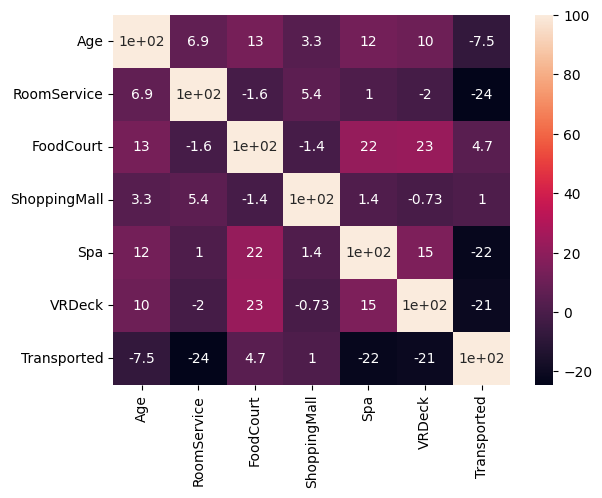

In [108]:
sns.heatmap(df.corr(numeric_only=True)*100, annot=True)

#Restructuring the Dataframe

In [109]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [110]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


#Missing Values

In [111]:
home = df['HomePlanet'].value_counts(dropna=False)
home.unique()

array([4602, 2131, 1759,  201])

In [112]:
px.bar(home.unique(), title='HomePlanet')

In [113]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

In [114]:
df['HomePlanet'].isnull().sum()

0

In [115]:
cryo = df['CryoSleep'].unique()
cryo

array([False, True, nan], dtype=object)

In [116]:
cryo = df['CryoSleep'].value_counts(dropna=False)
cryo

,count
CryoSleep,
False,5439
True,3037
NaN,217


In [117]:
px.bar(cryo.unique(), title='CryoSleep')

In [118]:
cryo.index

Index([False, True, nan], dtype='object', name='CryoSleep')

In [119]:
df['CryoSleep'].fillna(cryo.index[1], inplace=True)
df['CryoSleep'].isnull().sum()

0

In [154]:
df['CryoSleep'].value_counts()

,count
CryoSleep,
False,5439
True,3254


In [122]:
px.bar(df['CryoSleep'].value_counts(), title='CryoSleep')

In [164]:
desti = df['Destination'].value_counts(dropna=False)
desti

,count
Destination,
PSO J318.5-22,8693


In [145]:
px.bar(desti.unique(), title='Destination')

In [160]:
desti.index

Index(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype='object', name='Destination')

In [161]:
df['Destination'].fillna(desti.index[0], inplace=True)

In [162]:
df['Destination'].value_counts()

,count
Destination,
PSO J318.5-22,8693


In [163]:
df['Destination'].isnull().sum()

0

In [151]:
px.bar(df['Destination'].value_counts(), title='Destination')

#Encoding Categorical values

In [36]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['HomePlanet'] = encoder.fit_transform(df['HomePlanet'])
df['CryoSleep'] = encoder.fit_transform(df['CryoSleep'])
df['VIP'] = encoder.fit_transform(df['VIP'])
df['Transported'] = encoder.fit_transform(df['Transported'])

In [42]:
df['HomePlanet'].unique()

array([1, 0, 2, 3])

In [43]:
df_1 = df.copy(deep=True)

In [44]:
df_1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [48]:
df_1.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,182
Age,179
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208


In [45]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

In [47]:
df_1['HomePlanet'] = knn.fit_transform(df_1[['HomePlanet']])
"""
df_1['Cabin'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['Destination'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['Age'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['RoomService'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['FoodCourt'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['ShoppingMall'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['Spa'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['VRDeck'] = knn.fit_transform(df_1[['HomePlanet']])
df_1['Name'] = knn.fit_transform(df_1[['HomePlanet']])"""

In [53]:
df['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [54]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)